In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [31]:
data = pd.read_csv(r"D:\Assignment\Clustering\crime_data.csv")

In [32]:
data.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [34]:
# normalising the data
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
df_norm= pd.DataFrame(trans.fit_transform(data.iloc[:,1:]))
df_norm

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

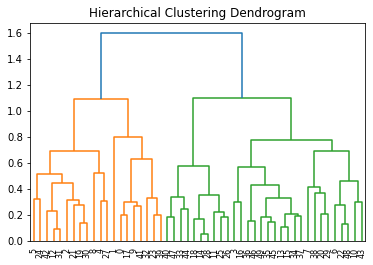

In [35]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(df_norm,method="complete",metric="euclidean"))
plt.title('Hierarchical Clustering Dendrogram')

In [36]:
#create clusters
from sklearn.cluster import AgglomerativeClustering 
hc= AgglomerativeClustering(n_clusters= 5, affinity= "euclidean", linkage= "single").fit(df_norm)
cluster_labels= pd.Series(hc.labels_)
data['clust']=cluster_labels
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [37]:
data.iloc[:,1:].groupby(data.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,7.613043,163.0,65.195652,20.232609,0
1,5.900000,238.0,72.000000,15.800000,1
2,15.400000,335.0,80.000000,31.900000,2
3,10.000000,263.0,48.000000,44.500000,3
4,7.900000,204.0,78.000000,38.700000,4


In [38]:
# Standardise the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
data_1=pd.DataFrame(scaler.fit_transform(data.iloc[:,1:]))
data_1

,0,1,2,3,4
0,1.255179,0.790787,-0.526195,-0.003451,-0.267261
1,0.513019,1.118060,-1.224067,2.509424,3.741657
2,0.072361,1.493817,1.009122,1.053466,-0.267261
3,0.234708,0.233212,-1.084492,-0.186794,-0.267261
4,0.281093,1.275635,1.776781,2.088814,-0.267261
5,0.025976,0.402909,0.869548,1.883901,5.077964
6,-1.040880,-0.736484,0.799761,-1.092723,-0.267261
7,-0.437875,0.815030,0.450825,-0.585834,1.069045
8,1.765415,1.990786,1.009122,1.150530,2.405351
9,2.229265,0.487757,-0.386621,0.492653,-0.267261


Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

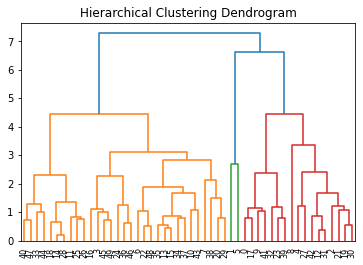

In [39]:
dendrogram= sch.dendrogram(sch.linkage(data_1,method="complete",metric="euclidean"))
plt.title('Hierarchical Clustering Dendrogram')

In [40]:
hc_1= AgglomerativeClustering(n_clusters= 5, affinity= "euclidean", linkage= "single").fit(data_1)

cluster_labels=pd.Series(hc_1.labels_)
cluster_labels
data['clust']=cluster_labels # creating a  new column and assigning it to new column 
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,4
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,0
